# Task 1 : Prediction using Supervised ML
Predict the percentage of an student based on number of study hours<br>
Linear regression with 1 variable<br>
Data at [http://bit.ly/w-data](http://bit.ly/w-data)<br>
Predict score of student if studies for 9.25 hrs/day

## Author : Vedant Kadam

Before doing anything else let's put the import statements at the top.

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Now let's download the data and load it into a pandas DataFrame

In [2]:
data=pd.read_csv("student_scores.csv")
display(data)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now that the data is loaded nd we can see there are only 25 elements.
<br>So let's put them in a scatter plot to get a idea of any trends we can see with naked eye

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

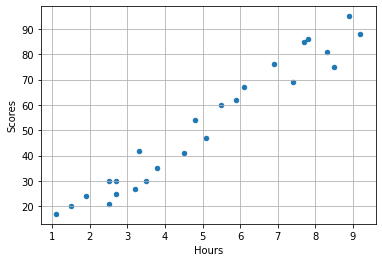

In [3]:
data.plot.scatter(x="Hours",y="Scores",grid=True)

From this it is visible that the trend is upwards, ie. the more hours studied the more scores students got, which is pretty intuitive<br>
So the line that we fit with linear regression will point upwards and will have a positive slope

# Train-Test Split
Now that we have seen the trends let's split the data into 4 parts:
- X_train
- X_test
- Y_train
- Y_test

In [4]:
X = data.iloc[:, :-1].values #hours
Y = data.iloc[:, 1].values #score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=3) 

# Train Liner Regression

Now that we have the data in segments we can use the scikitlearn module that will train it on linear regression<br>
Later we can predict on that model and solve the task

In [5]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,Y_train)
print("Linear Regression Training Complete")

Linear Regression Training Complete


Now let's plot this regressor onto the scatter plot to check if it fits visually

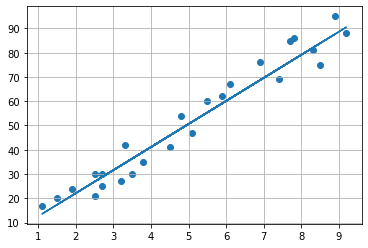

In [6]:
line = reg.coef_*X+reg.intercept_
plt.scatter(X,Y)
plt.plot(X,line)
plt.grid()
plt.show()

# Testing on test data and making predictions
Now that the model is trained. Let's test it out on the test data

In [7]:
Y_ans=reg.predict(X_test)
print(Y_ans)

[61.07240199 21.18113131 45.87572744 68.67073926 87.66658244]


In [8]:
display(pd.DataFrame({"Hours Studied":X_test.flatten(),"Predicted Score":Y_ans,"Actual Score":Y_test}))

,Hours Studied,Predicted Score,Actual Score
0,6.1,61.072402,67
1,1.9,21.181131,24
2,4.5,45.875727,41
3,6.9,68.670739,76
4,8.9,87.666582,95


In our question we were given to predict score of student if studies for 9.25 hrs/day. So let's do that

In [9]:
display(pd.DataFrame({"Hours Studies":[9.25],"Predicted Score":reg.predict(np.array([[9.25]]))}).style.hide_index())

C:\Users\vedantkadam\AppData\Local\Temp\ipykernel_8320\484136225.py:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(pd.DataFrame({"Hours Studies":[9.25],"Predicted Score":reg.predict(np.array([[9.25]]))}).style.hide_index())


Hours Studies,Predicted Score
9.250000,90.990855


We can see from the above that the predicted score for **studying for 9.25 hrs** is **90.99 ≈ 91**

# Checking Performance of Model
Now that we have the answer. Now let's see the performance of the model.
<br>Some of the common metrics that I used was:
- R2 Score
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared(RMS) Error

In [10]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("R2 Score :",r2_score(Y_test,Y_ans))
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_ans)) 
print('Root Mean Squared Error:',mean_squared_error(Y_test,Y_ans,squared=False)) 
print('Mean Squared Error:',mean_squared_error(Y_test,Y_ans,squared=True)) 

R2 Score : 0.9452617628334009
Mean Absolute Error: 5.656974488548374
Root Mean Squared Error: 5.905120371729122
Mean Squared Error: 34.87044660461029
